In [2]:
!pip install torch torchvision -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [3]:
!pip install torchinfo

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

In [5]:
print(f'Torch version: {torch.__version__}')

Torch version: 2.2.2+cu121


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# mean and std according to https://pytorch.org/vision/main/models/generated/torchvision.models.resnet34.html
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [8]:
train_transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

test_transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)])

In [31]:
trainset = torchvision.datasets.Food101(root='./drive/My Drive/food101/datasets',
                                        split ='train',
                                        download=True,
                                        transform=train_transform)

100%|██████████| 4996278331/4996278331 [04:51<00:00, 17147135.95it/s]


Extracting ./drive/My Drive/food101/datasets/food-101.tar.gz to ./drive/My Drive/food101/datasets


In [32]:
testset = torchvision.datasets.Food101(root='./drive/My Drive/food101/datasets',
                                       split='test',
                                       download=True,
                                       transform=train_transform)

In [33]:
batch_size = 1000
num_workers = 4

In [34]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers)

In [35]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=num_workers)

In [36]:
print(trainset.classes)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [37]:
model = models.resnet34(pretrained=True)

In [38]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─BasicBlock: 2-1                   --
│    │    └─Conv2d: 3-1                  36,864
│    │    └─BatchNorm2d: 3-2             128
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  36,864
│    │    └─BatchNorm2d: 3-5             128
│    └─BasicBlock: 2-2                   --
│    │    └─Conv2d: 3-6                  36,864
│    │    └─BatchNorm2d: 3-7             128
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  36,864
│    │    └─BatchNorm2d: 3-10            128
│    └─BasicBlock: 2-3                   --
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            12

In [39]:
num_features = model.fc.in_features
print(f'The number of features on the pretrained model: {num_features}')

The number of features on the pretrained model: 512


In [40]:
num_food_classes = len(trainset.classes)
model.fc = nn.Linear(num_features, num_food_classes)

In [41]:
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(),
                       lr=learning_rate)

In [42]:
exp_lr_scheduler = lr_scheduler.StepLR(optimizer,
                                       step_size=10,
                                       gamma=0.9)

In [43]:
criterion = nn.CrossEntropyLoss()

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
def compute_average_validation_loss_and_accuracy(model,
                                    testloader,
                                    criterion,
                                    device):
  model.eval()
  val_loss = 0.0
  correct= 0
  total = 0
  with torch.no_grad():
    for inputs, labels in testloader:
      inputs, labels = inputs.to(device), labels.to(device)

      outputs = model(inputs)
      loss = criterion(outputs, labels)
      val_loss += loss.item() * inputs.size(0)

      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  average_val_loss = val_loss / len(testloader.dataset)
  accuracy = correct/total
  return (average_val_loss, accuracy)

In [46]:
def show_loss_and_accuracy_details(epoch_number,
                                   total_number_epochs,
                                   average_val_loss,
                                   accuracy):
  print(f'Epoch [{epoch+1}/{total_number_epochs}], Validation Loss: {average_val_loss:.4f}, Accuracy: {accuracy:.4f}')

In [47]:
def save_checkpoint_model(epoch,
                          model_state_dict,
                          optimizer_state_dict,
                          loss,
                          checkpoint_path):
  checkpoint_path = f'{checkpoint_path}model{epoch}.pt'
  torch.save({
      'epoch': epoch,
      'model_state_dict': model_state_dict,
      'optimizer_state_dict': optimizer_state_dict,
      'loss': loss
  }, checkpoint_path)

In [48]:
checkpoint_path = './drive/My Drive/food101/checkpoints/'

In [49]:
num_training_epochs = 120

In [51]:
model.to(device)

best_accuracy = 0.0
avg_validation_losses = []
accuracies = []

for epoch in range(num_training_epochs):
  print(f'Training - epoch {epoch + 1}.')

  model.train()
  for inputs, labels in trainloader:
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  #compute avg validation loss and accuracy
  avg_validation_loss, accuracy = compute_average_validation_loss_and_accuracy(model, testloader, criterion, device)
  avg_validation_losses.append(avg_validation_loss)
  accuracies.append(accuracy)

  #save the model with the best accuracy
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    torch.save(model, './drive/My Drive/food101/best_accuracy.pt')

  #save checkpoints and show statistics
  if epoch % 3 == 0:
    save_checkpoint_model(epoch, model.state_dict(), optimizer.state_dict(), loss, checkpoint_path)
    show_loss_and_accuracy_details(epoch, num_training_epochs, avg_validation_loss, accuracy)

Training - epoch 1.
Epoch [1/120], Validation Loss: 1.8584, Accuracy: 0.5703
Training - epoch 2.
Training - epoch 3.
Training - epoch 4.
Epoch [4/120], Validation Loss: 1.1397, Accuracy: 0.7130
Training - epoch 5.
Training - epoch 6.
Training - epoch 7.
Epoch [7/120], Validation Loss: 1.0020, Accuracy: 0.7386
Training - epoch 8.
Training - epoch 9.
Training - epoch 10.
Epoch [10/120], Validation Loss: 0.9970, Accuracy: 0.7388
Training - epoch 11.
Training - epoch 12.
Training - epoch 13.
Epoch [13/120], Validation Loss: 0.9537, Accuracy: 0.7491
Training - epoch 14.
Training - epoch 15.
Training - epoch 16.
Epoch [16/120], Validation Loss: 0.9342, Accuracy: 0.7570
Training - epoch 17.
Training - epoch 18.
Training - epoch 19.
Epoch [19/120], Validation Loss: 0.9354, Accuracy: 0.7568
Training - epoch 20.
Training - epoch 21.
Training - epoch 22.
Epoch [22/120], Validation Loss: 0.9249, Accuracy: 0.7606
Training - epoch 23.
Training - epoch 24.
Training - epoch 25.
Epoch [25/120], Validat

In [52]:
print(f'Best accuracy: {best_accuracy}.')

Best accuracy: 0.7745346534653466.


In [53]:
model.eval()
with torch.no_grad():
  _ , accuracy = compute_average_validation_loss_and_accuracy(model, testloader, criterion, device)
  print(f'Accuracy of the model on the test images: {accuracy*100:.4f}')


Accuracy of the model on the test images: 77.3228


In [54]:
torch.save(model, './drive/My Drive/food101/food101model.pt')

In [55]:
!pip install onnx
!pip install onnxscript

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.4/582.4 kB 11.8 MB/s eta 0:00:00


In [56]:
sample_input = torch.randn(1, 3, 224, 224).cuda()

onnx_file_path = "./drive/My Drive/food101/trained_model.onnx"

torch.onnx.export(model, sample_input, onnx_file_path)

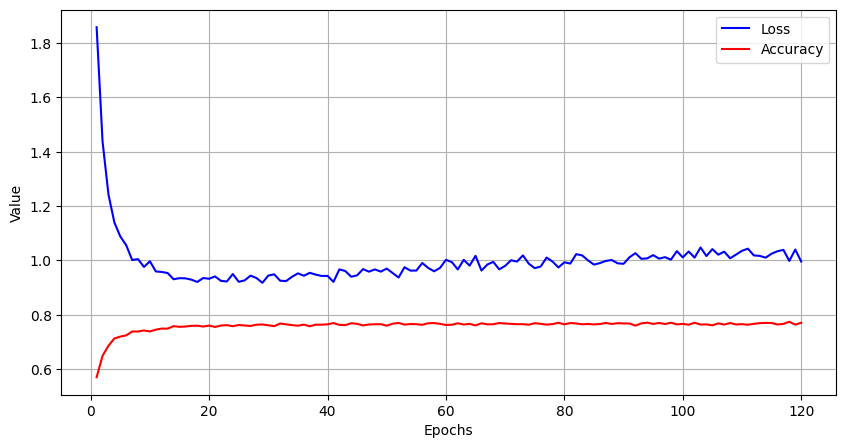

In [61]:
import matplotlib.pyplot as plt

epochs = range(1, num_training_epochs + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, avg_validation_losses, 'b', label='Loss')
plt.plot(epochs, accuracies, 'r', label='Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()